In [16]:
import pandas as pd
X=pd.read_csv('./nginx_Xfinal.csv').iloc[:,1:]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   component_name                  7692 non-null   object 
 1   component_version               7692 non-null   object 
 2   cpu_limit                       612 non-null    float64
 3   cvm_cpu                         7015 non-null   float64
 4   cvm_cpu_qos                     4950 non-null   object 
 5   cvm_cpu_type                    6533 non-null   object 
 6   cvm_gpu_type                    108 non-null    object 
 7   cvm_memory                      7015 non-null   object 
 8   cvm_os_type                     7002 non-null   object 
 9   cvm_version                     6412 non-null   object 
 10  host_configured_clock_speed     249 non-null    object 
 11  host_cpu_isolation:dpdk         1098 non-null   object 
 12  host_cpu_isolation:host         10

In [17]:
# 舍弃阈值
threshold=len(X)*0.4
delete_column=[]
for column in X.columns:
    if(X[column].count()<threshold):
        delete_column.append(column)
X.drop(columns=delete_column,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   component_name          7692 non-null   object 
 1   component_version       7692 non-null   object 
 2   cvm_cpu                 7015 non-null   float64
 3   cvm_cpu_qos             4950 non-null   object 
 4   cvm_cpu_type            6533 non-null   object 
 5   cvm_memory              7015 non-null   object 
 6   cvm_os_type             7002 non-null   object 
 7   cvm_version             6412 non-null   object 
 8   host_cpu_type           3850 non-null   object 
 9   host_manufacturer_name  3905 non-null   object 
 10  host_memory_type        3905 non-null   object 
 11  platform                7023 non-null   object 
 12  test_name               7692 non-null   object 
 13  tool_name               7692 non-null   object 
 14  tool_version            7692 non-null   

In [18]:
#相同配置取最后一项，这是由于数据有时序性，且发现数据集中较早测的有严重偏差
X=X.drop_duplicates(keep='last')
X.drop(columns=["component_name","tool_name"],inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4776 entries, 21 to 7691
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   component_version       4776 non-null   object 
 1   cvm_cpu                 4709 non-null   float64
 2   cvm_cpu_qos             3239 non-null   object 
 3   cvm_cpu_type            4407 non-null   object 
 4   cvm_memory              4709 non-null   object 
 5   cvm_os_type             4697 non-null   object 
 6   cvm_version             4339 non-null   object 
 7   host_cpu_type           2378 non-null   object 
 8   host_manufacturer_name  2433 non-null   object 
 9   host_memory_type        2433 non-null   object 
 10  platform                4713 non-null   object 
 11  test_name               4776 non-null   object 
 12  tool_version            4776 non-null   object 
 13  results_key             4776 non-null   object 
dtypes: float64(1), object(13)
memory usage:

In [19]:
# component_version部分值格式异常，含有中文
import re
# 判断传入字符串，判断是否包含中文
zh_pattern = re.compile('[\u4e00-\u9fa5]+')
zh_index=[]
for i in range(len(X)):
    index=X.index[i]
    if(re.search(pattern=zh_pattern,string=X["component_version"][index])):
        zh_index.append(index)
X.drop(index=zh_index,inplace=True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 21 to 7691
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   component_version       4774 non-null   object 
 1   cvm_cpu                 4707 non-null   float64
 2   cvm_cpu_qos             3239 non-null   object 
 3   cvm_cpu_type            4407 non-null   object 
 4   cvm_memory              4707 non-null   object 
 5   cvm_os_type             4695 non-null   object 
 6   cvm_version             4337 non-null   object 
 7   host_cpu_type           2378 non-null   object 
 8   host_manufacturer_name  2433 non-null   object 
 9   host_memory_type        2433 non-null   object 
 10  platform                4711 non-null   object 
 11  test_name               4774 non-null   object 
 12  tool_version            4774 non-null   object 
 13  results_key             4774 non-null   object 
dtypes: float64(1), object(13)
memory usage:

In [20]:
y_final=pd.read_csv('./nginx_yfinal.csv').iloc[:,1:3]
y_final["#wrk_qps_avg"].fillna(y_final["#wrk_req_sec_avg"],inplace=True)
y_final.drop(columns=["#wrk_req_sec_avg"],inplace=True)
y_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7692 entries, 0 to 7691
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #wrk_qps_avg  7692 non-null   float64
dtypes: float64(1)
memory usage: 60.2 KB


In [21]:
y_final=y_final.iloc[X.index]
y_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4774 entries, 21 to 7691
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #wrk_qps_avg  4774 non-null   float64
dtypes: float64(1)
memory usage: 74.6 KB


In [22]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
X_encode=ohe.fit_transform(X)
X_encode

<4774x524 sparse matrix of type '<class 'numpy.float64'>'
	with 66836 stored elements in Compressed Sparse Row format>

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encode, y_final, test_size=0.2, random_state=1)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
y_pred =rfg.fit(X_train, y_train).predict(X_test)


C:\Users\zhangyangli\AppData\Local\Temp\ipykernel_10624\2256646058.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred =rfg.fit(X_train, y_train).predict(X_test)


In [25]:
y_test_index=y_test.index
y_test.reset_index(drop=True,inplace=True)

In [26]:
y_dis=[]
for i in range(len(y_pred)):
    y_dis.append(abs(y_pred[i]-y_test["#wrk_qps_avg"][i]))
y_dis

[417.6129999999612,
 52888.276399999944,
 645.0475000000224,
 113116.40490000014,
 26196.467600000324,
 53347.44890000031,
 19835.330400000003,
 1069.7996999999887,
 260939.35479999974,
 16729.36260000005,
 104822.64489999937,
 96869.52300000028,
 11838.232299999916,
 978.6676999999763,
 13280.79789999986,
 2642.3123999999953,
 1363715.498999997,
 103712.33710000082,
 20403.164199999854,
 251066.01049999567,
 215225.93679999944,
 12327.769700000106,
 18557.97080000007,
 31661.667200000607,
 170447.7994999995,
 11514.590099999943,
 2923.8504000000103,
 4541.580099999963,
 190275.1351999999,
 58644.18849999993,
 11542.528399999996,
 41880.2328,
 170282.3631999998,
 12936.331800000029,
 4372.042599999957,
 34164.538300000015,
 611.2663999999713,
 19692.118600000278,
 752.8432999998622,
 1216041.2528000001,
 10959.828400000028,
 170451.24700000137,
 74230.50589999883,
 790.0308999999543,
 1529.73739999994,
 266576.3065000002,
 18264.012499999924,
 15472.401500000036,
 664951.5124000032,
 3

In [27]:
import numpy as np
pd.DataFrame(data=np.column_stack((y_test_index,y_test,y_pred,y_dis)),columns=["index","test","pred","dis"]).to_csv('y_dis.csv')

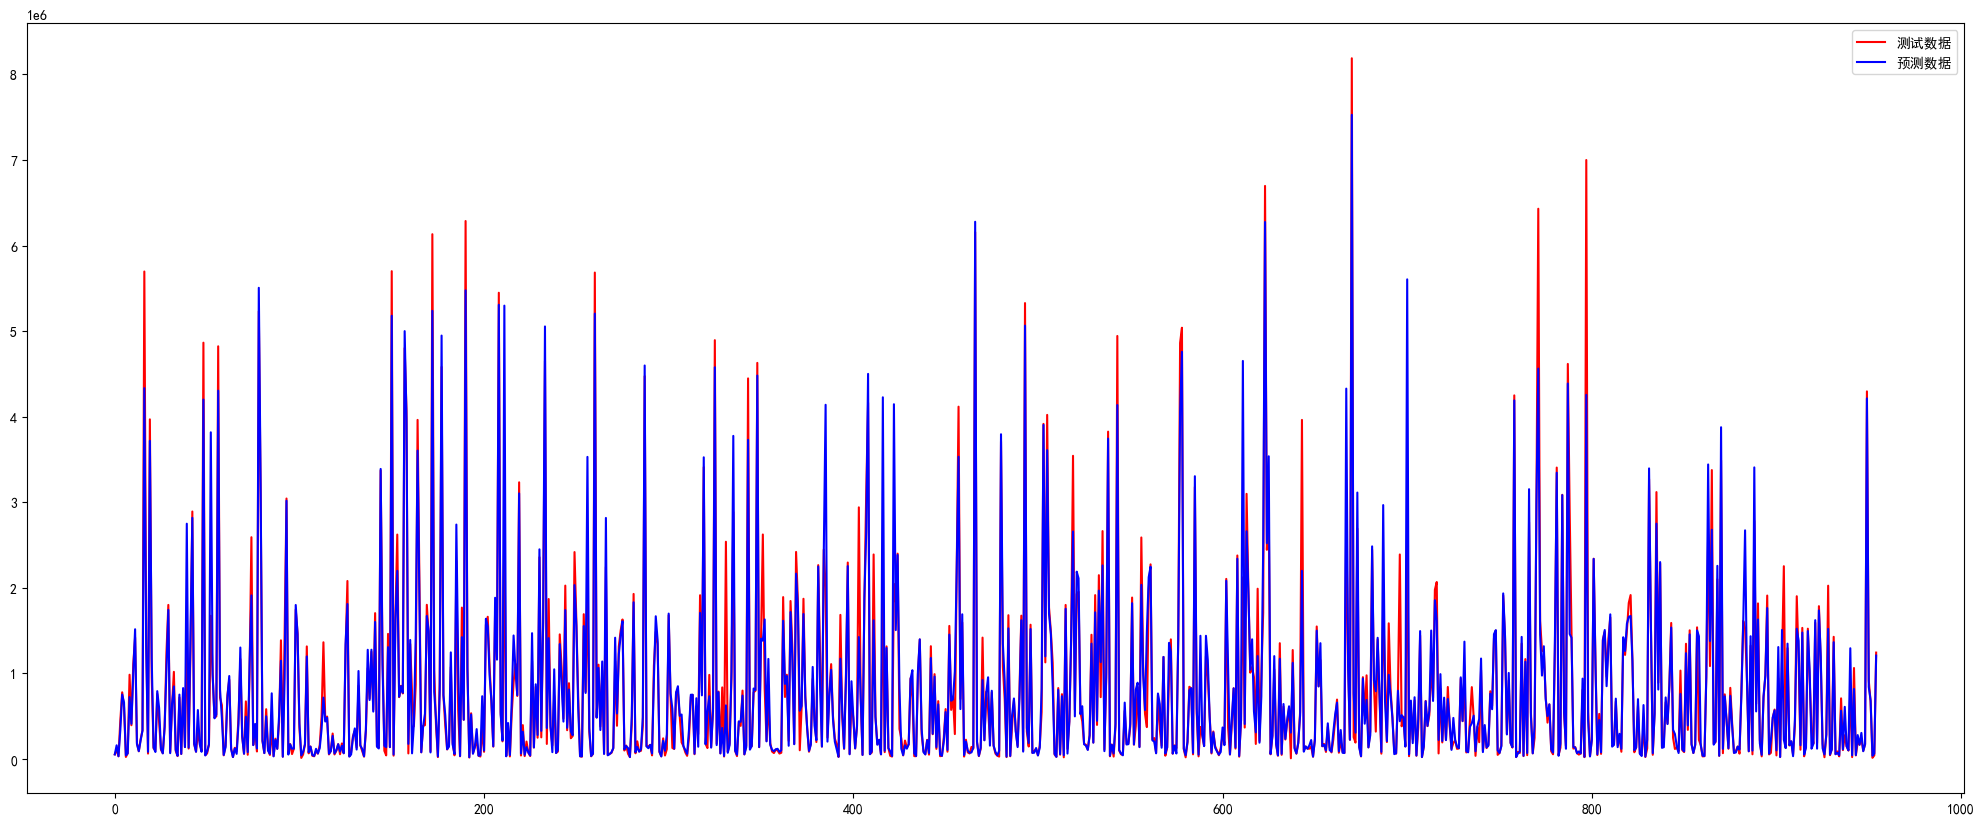

In [28]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.figure(figsize=(25,10))
plt.plot(range(len(y_test)), y_test, 'r', label='测试数据')
plt.plot(range(len(y_pred)), y_pred, 'b', label='预测数据')
plt.legend()
plt.savefig('./RFG.png')

In [30]:
from sklearn import metrics
import numpy as np
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
MAE = metrics.mean_absolute_error(y_test, y_pred)
r2=metrics.r2_score(y_test, y_pred)
print('MSE:',MSE)
print('RMSE:',RMSE)
print("MAE:",MAE)
print("R2决定系数:",r2)


MSE: 119843401708.00716
RMSE: 346184.05755899154
MAE: 135917.57302774713
R2决定系数: 0.9082955872952623


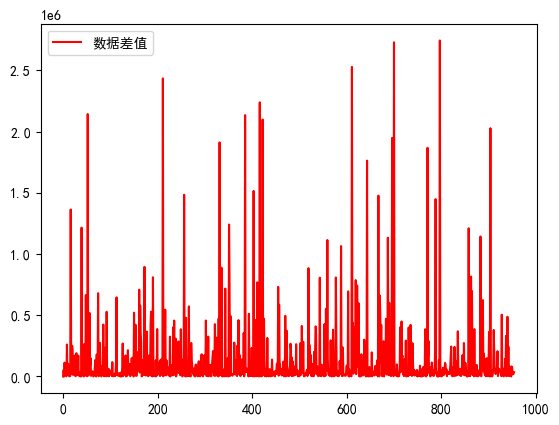

In [31]:
plt.plot(range(len(y_dis)), y_dis, 'r', label='数据差值')
plt.legend()